In [1]:
from pathlib import Path

import pandas as pd

In [2]:
p_books_with_predictions = Path('../data/books_predictions.csv')

In [3]:
df_books = pd.read_csv(p_books_with_predictions)
for col in ['categories', 'learning_items', 'pred_reasoning_steps', 'pred_categories']:
    df_books[col] = df_books[col].apply(lambda s: [] if pd.isna(s) else s.split('|'))

In [4]:
df_books.head()

,Unnamed: 0,firebase_document_path,id,title,author,overview,author_overview,categories,learning_items,pred_reasoning_steps,pred_categories
0,0,books/0059543c-a8e5-4615-a78c-69f8e73c19c1,0059543c-a8e5-4615-a78c-69f8e73c19c1,Parenting the New Teen in the Age of Anxiety: ...,John Duffy,What’s inside\nYou're looking at a modern pare...,John Duffy is a successful clinical psychologi...,[Family],"[Why your teenager is glued to their screens, ...","[The book is a guide for parents, specifically...","[Family, Self-Growth, Society & Tech]"
1,1,books/00bb4531-5150-44af-9eb1-c160c7d26ed6,00bb4531-5150-44af-9eb1-c160c7d26ed6,"Right Thing, Right Now: Good Values, Good Char...",Ryan Holiday,What’s inside\nThe modern world has many fasci...,Ryan Holiday is known for bringing philosophy ...,[Self-Growth],[Which four core virtues pave the way to a suc...,"[The book discusses moral codes and virtues, w...","[Self-Growth, Happiness, Health]"
2,2,books/012399fc36f74c489e4e,012399fc36f74c489e4e,Eat Move Sleep: How Small Choices Lead to Big ...,Tom Rath,"What’s inside\nDiscover how inner strength, wi...",Tom Rath is a renowned author of best-selling ...,[Health],"[The power of positive dietary choices, How mo...",[The book focuses on well-being and how small ...,"[Health, Self-Growth, Sports & Fitness]"
3,3,books/012d6fde-51e2-4289-822a-1cbb57394bcd,012d6fde-51e2-4289-822a-1cbb57394bcd,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,What’s inside\nAchieving your dreams is fulfil...,Arthur C. Brooks is a scientist whose research...,"[Happiness, Self-Growth]","[The two kinds of intelligence , How to maximi...",[The book discusses finding purpose and fulfil...,"[Happiness, Self-Growth]"
4,4,books/017dab0f35d34af59653,017dab0f35d34af59653,"Dream Big: Know What You Want, Why You Want It...",Bob Goff,What’s inside\nBreak free from the cycle of un...,"Robert Kendall Goff is a speaker, lawyer, auth...",[Self-Growth],"[Ways to pick one ambition to focus on, Strate...",[The book focuses on achieving goals and ambit...,"[Self-Growth, Productivity, Happiness]"


In [5]:
# Flatten the lists in each column and get unique values
unique_categories = set(cat for sublist in df_books['categories'] for cat in sublist)
unique_pred_categories = set(cat for sublist in df_books['pred_categories'] for cat in sublist)

# Print the counts
print(f"Number of unique categories: {len(unique_categories)}")
print(f"Number of unique predicted categories: {len(unique_pred_categories)}")
print(f"Same categories: {len(set(unique_categories) & set(unique_pred_categories))}")

Number of unique categories: 16
Number of unique predicted categories: 16
Same categories: 16


In [6]:
def show_books(df: pd.DataFrame) -> None:
    for i, row in df.iterrows():
        print(f'Book (idx={i})')
        print(f' - Title: "{row["title"]}"')
        print(f' - Author: {row["author"]}')
        newline = "\n"
        print(f' - Overview: {row["overview"].replace(newline, " ") if row["overview"] is not None else None}')
        print(f' - Author Overview: {row["author_overview"].replace(newline, " ") if row["author_overview"] is not None else None}')
        print(f' - Learning items: {row["learning_items"]}')
        print(f' - Categories: {row["categories"]}')
        print(f' - AI Categories: {row["pred_categories"]}')
        print(f' - AI Reasoning Steps: {row["pred_reasoning_steps"]}')
        print()
        print()

In [7]:
show_books(df_books.sample(10, random_state=42))

Book (idx=1791)
 - Title: "Modern Romance"
 - Author: Aziz Ansari, Eric Klinenberg, PhD
 - Overview: What’s inside Find out how the image of love has changed over the past century and realize that there is no universal norm for romantic relationships.You’ll learn • The secrets of grandma's happy marriage • About dating in different countries • The impact of social media on personal life • How to meet your one and only About the author Aziz Ansari is a comedian and writer included in the 2016 Time 100 list of most influential people. Eric Klinenberg is a professor of Social Science and Director of the Institute for Public Knowledge at New York University.
 - Author Overview: Aziz Ansari is a comedian and writer included in the 2016 Time 100 list of most influential people. Eric Klinenberg is a professor of Social Science and Director of the Institute for Public Knowledge at New York University.
 - Learning items: ["The secrets of grandma's happy marriage", 'About dating in different cou

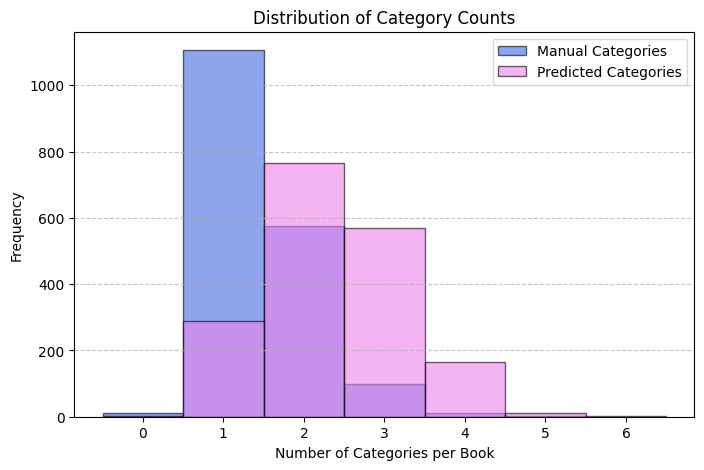

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_category_count_distribution(df, col1, col2, title='Distribution of Category Counts'):
    """
    Plots the distribution of the number of categories per book for both manual and predicted categories.
    
    :param df: Pandas DataFrame
    :param col1: First column (manual categories)
    :param col2: Second column (predicted categories)
    :param title: Title of the plot
    """
    # Compute number of categories per book
    manual_counts = df[col1].apply(len)
    predicted_counts = df[col2].apply(len)

    # Set bins based on max count
    max_count = max(manual_counts.max(), predicted_counts.max())
    bins = np.arange(0, max_count + 1.5) - 0.5  # Ensure integer bin edges

    # Plot histograms
    plt.figure(figsize=(8, 5))
    plt.hist(manual_counts, bins=bins, alpha=0.6, color='royalblue', edgecolor='black', label='Manual Categories')
    plt.hist(predicted_counts, bins=bins, alpha=0.6, color='violet', edgecolor='black', label='Predicted Categories')

    # Labels and formatting
    plt.xlabel('Number of Categories per Book')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(range(0, max_count + 1))
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Usage
plot_category_count_distribution(df_books, 'categories', 'pred_categories')


 - The most common number of manual categories — 1
 - The number of predicted categories has wider distribution. Mode — 2 ,then 3, and only then 1.

Why? The obvious question is 
 - Does AI has tendency to assign irrelevant categories?

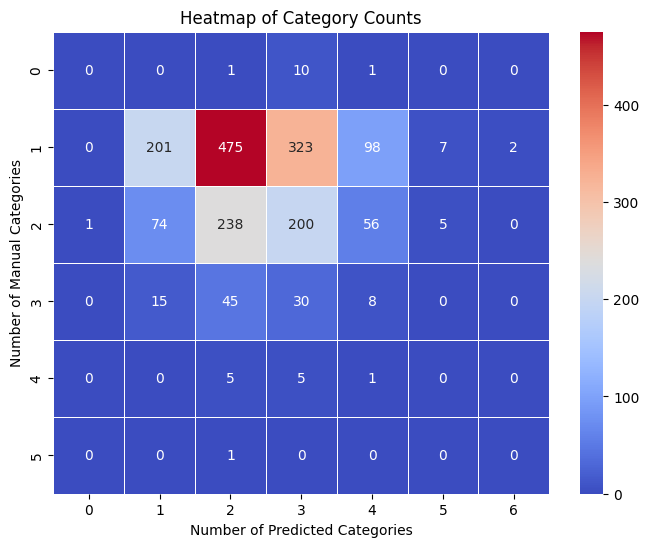

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_category_count_heatmap(df, col1, col2, title='Heatmap of Category Counts'):
    """
    Plots a heatmap showing the relationship between the number of manual and predicted categories per book.
    
    :param df: Pandas DataFrame
    :param col1: First column (manual categories)
    :param col2: Second column (predicted categories)
    :param title: Title of the plot
    """
    # Compute number of categories per book
    manual_counts = df[col1].apply(len)
    predicted_counts = df[col2].apply(len)

    # Create a dataframe for heatmap
    heatmap_data = pd.crosstab(manual_counts, predicted_counts)

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)

    # Labels and formatting
    plt.xlabel('Number of Predicted Categories')
    plt.ylabel('Number of Manual Categories')
    plt.title(title)
    plt.show()

# Usage
plot_category_count_heatmap(df_books, 'categories', 'pred_categories')


In [10]:
# ensure validity of the plot above
len(df_books[(df_books['categories'].apply(len) == 1) & (df_books['pred_categories'].apply(len) == 2)])

475

Here we see the picture in more detail. 
 - The most common case — there is 1 manual category but AI predicts 2; in the similar vein, AI predicting 3 categories is the second most common case. 
 - Although less frequently, the number of categories assign can match (for 1 and 2, mostly).
 - There are some outliers. Noticeably, there are cases when summaries have no manual categories at all, but AI predicts 2-4 categories. There is one case when AI hasn't assigned any category (but there is one manual category). Also, interestingly, there is the case when there are 5 manual categories and only 2 AI categories.

In [11]:
show_books(df_books[(df_books['categories'].apply(len) == 1) & (df_books['pred_categories'].apply(len) == 2)].sample(n=10, random_state=42))

Book (idx=1358)
 - Title: "Stock Investing for Dummies"
 - Author: Paul Mladjenovic
 - Overview: What’s inside Open the door to a happy and fulfilling life by learning the secrets of successful investing and searching for companies and brokers.You’ll learn • The difference between common and preferred stock • Who company insiders are • Time-tested financial strategies • Five levels of market capitalization • How to check your broker About the author Paul Mladjenovic is an American speaker and educator. He has written books on investing and financial literacy for over twenty years. He also annually conducts more than a hundred workshops on investment strategies.
 - Author Overview: Paul Mladjenovic is an American speaker and educator. He has written books on investing and financial literacy for over twenty years. He also annually conducts more than a hundred workshops on investment strategies.
 - Learning items: ['The difference between common and preferred stock', 'Who company insiders

#### So does AI tend to assign irrelevant categories? Or are the manual categoris not complete?

**JUSTIFIED** will mean that AI has assigned a valid category, i.e. manually assigned categories are not complete. \
**NOT JUSTIFIED**, on the other hand, will mean that AI has assigned redundant, irrelevant category. \ 
We'll use other notations to express ambiguity, etc.


 - 1358 — Interestingly, AI reasoning steps underline the fact that Business & Career is not a fitting category, but it's still present in the final categories. **NOT JUSTIFIED**
 - 1588 — Sports & Fitness is definitelly a fitting category. **JUSTIFIED**
 - 62 — Self-Growth definitely has a relevance to this book, especially considering the Overview. At the same time, it seems slightly off, most non-fiction books can be related to Self-Growth. **AMBIGUOUS**
 - 247 — Self-Growth seems relevant here. **JUSTIFIED**
 - 1288 — Productivity doesn't seem relevant, although AI tries to justify it. **NOT JUSTIFIED**
 - 138 — Interestingly, the two AI categories differ from the one manual category. The overview of the book inclines towards Self-Growth category, although it doesn't seem to be a relevant topic. Business & Career (especially Business) fits. Money & Investment is missing. **PARTIALLY JUSTIFIED**
 - 268 — Business & Career fits. **JUSTIFIED**
 - 1669 — The book includes the story of the family, so Famaily seems a valid category here. **JUSTIFIED**
 - 396 — The categories assigned by AI are valid, but the one manual category should have also been included. **JUSTIFIED**
 - 320 — Again, Self-Growth is relevant, but does seem superfluous. **PARTIALLY JUSTIFIED**


#### CONCLUSIONS
 - It seems that detailed specification of every category would be very beneficial. Passing these specification to AI might significantly improve the accuracy. 
 - The assignment of categories by AI that are not present within manually assigned categoires is often justified. I.e., those categories seem to be missing.
 - Self-Growth is a very common topic with non-fiction books, but frequently its presence seems superfluous.
 - Sometimes, AI hallucinates and assignes invalid categories (#1288)
 - AI can be inconsistent. While it's thoughts about #1358 are valid, the presence of Business & Carreer in final list of categories contradicts them. Additional prompt/flow imporvements might be desirable.


##### Deprecated (indexes are off)
 - 1030 - Happiness seems like a relevant category. **JUSTIFIED**
 - 1765 — A more tricky one, BUT there are mentions of money/investing, moreover, Goodreads assigned category "Finance" as the second most relevant. ***PROBABLY* JUSTIFIED**
 - 1540 — The point is that so many non-fiction books can be related to Self-Growth (as reasoning steps, actually, justify it). PROBABLY JUSTIFIED 
 - 509 — The book definitely expands on Sports & Fitness. **JUSTIFIED**
 - 1775 — Tricky one, in Ukrainian. But the category Presonalities is definitely suitable. **JUSTIFIED**
 - 439 — Business & Career seems a totally fitting category. **JUSTIFIED**


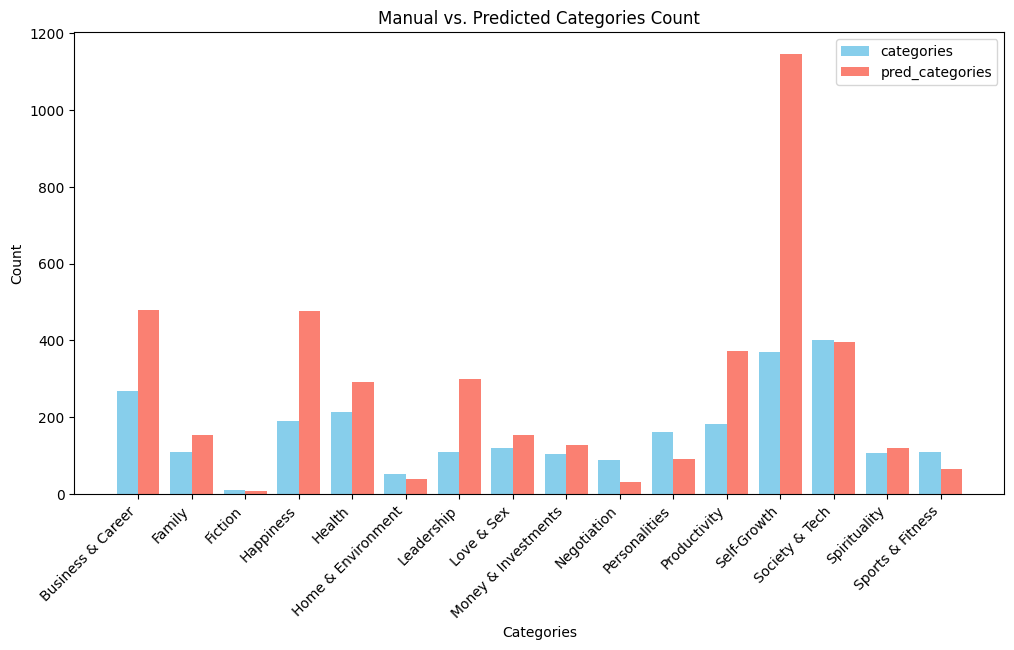

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def plot_category_comparison(df, col1, col2, title):
    """
    Plots the count of each category for two columns in the same bar chart.
    
    :param df: Pandas DataFrame
    :param col1: First column name containing lists of categories
    :param col2: Second column name containing lists of categories
    :param title: Title for the plot
    """
    # Count occurrences in both columns
    counts_col1 = Counter(cat for sublist in df[col1] for cat in sublist)
    counts_col2 = Counter(cat for sublist in df[col2] for cat in sublist)

    # Get all unique categories
    all_categories = sorted(set(counts_col1.keys()).union(set(counts_col2.keys())))

    # Get counts in order, defaulting to 0 if category is missing
    values_col1 = [counts_col1.get(cat, 0) for cat in all_categories]
    values_col2 = [counts_col2.get(cat, 0) for cat in all_categories]

    # Set up bar positions
    x = np.arange(len(all_categories))
    width = 0.4  # Bar width

    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, values_col1, width=width, label=col1, color='skyblue')
    plt.bar(x + width/2, values_col2, width=width, label=col2, color='salmon')

    # Labels and title
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(ticks=x, labels=all_categories, rotation=45, ha='right')
    plt.legend()
    plt.show()

# Usage
plot_category_comparison(df_books, 'categories', 'pred_categories', 'Manual vs. Predicted Categories Count')


 - Overall, AI tends to use categories more (i.e., assigns more categories than humans on average).
 - The distribution of the number of books across categories is highly ununiform.
 - Many categories are used by AI significantly more than by manual categorizers: Business & Career, Happiness, Leadership, Productivity, Self-Growth. A common pattern across those topics — broadness and some uncertainty. 
 - Self-Growth is a category that is especially over-used by AI. No wonder — most non-fiction books can be somehow related to this. Again, specification and more tuned instructions should help.
 - Some categories are almost unused: fiction, Home & Envoronment.

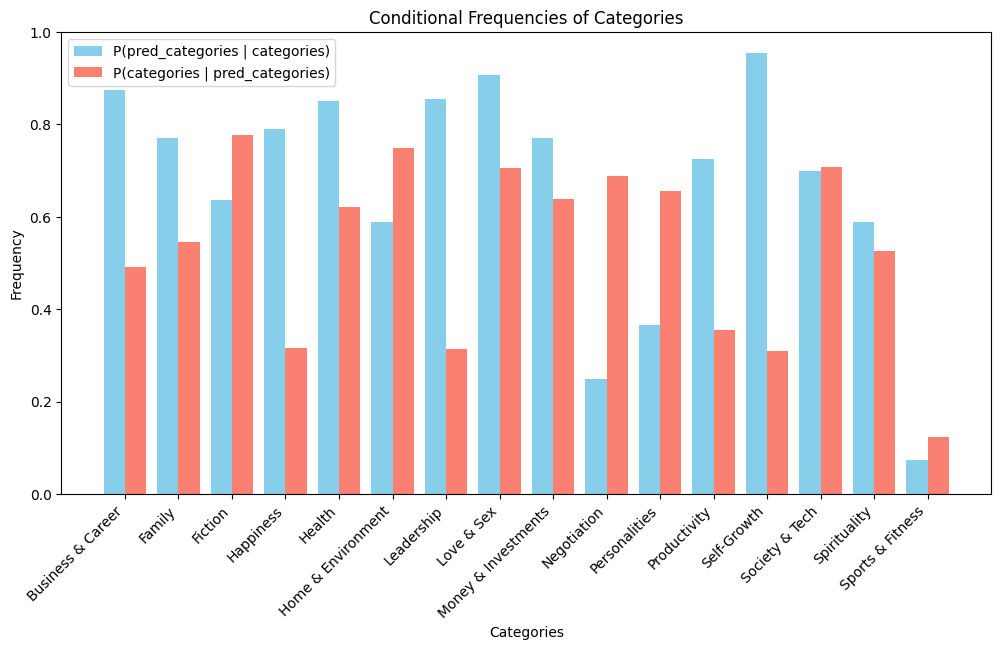

In [13]:
import matplotlib.pyplot as plt
import numpy as np


def compute_conditional_frequencies(df, col1, col2):
    """
    Computes the conditional probabilities P(col2 | col1) and P(col1 | col2).
    
    :param df: Pandas DataFrame
    :param col1: First column name containing lists of categories (manual or predicted)
    :param col2: Second column name containing lists of categories (predicted or manual)
    :return: Two dictionaries with conditional probabilities
    """
    # Count occurrences for conditional probabilities (initialization)
    count_col1 = {cat: 0 for sublist in df[col1] for cat in sublist}
    count_col2_given_col1 = {cat: 0 for sublist in df[col1] for cat in sublist}

    count_col2 = {cat: 0 for sublist in df[col2] for cat in sublist}
    count_col1_given_col2 = {cat: 0 for sublist in df[col2] for cat in sublist}

    # Compute co-occurrences
    for _, row in df.iterrows():
        manual_cats = set(row[col1])
        pred_cats = set(row[col2])
        
        for cat in manual_cats:
            count_col1[cat] += 1
            count_col2_given_col1[cat] += int(cat in pred_cats)  # Matching predictions
        
        for cat in pred_cats:
            count_col2[cat] += 1
            count_col1_given_col2[cat] += int(cat in manual_cats)  # Matching manual labels

    # Compute conditional probabilities
    prob_col2_given_col1 = {cat: count_col2_given_col1[cat] / count_col1[cat] for cat in count_col1 if count_col1[cat] > 0}
    prob_col1_given_col2 = {cat: count_col1_given_col2[cat] / count_col2[cat] for cat in count_col2 if count_col2[cat] > 0}

    return prob_col2_given_col1, prob_col1_given_col2


def plot_conditional_frequencies(df, col1, col2, title):
    """
    Plots conditional frequencies P(col2 | col1) and P(col1 | col2) as bar plots.
    """
    prob_col2_given_col1, prob_col1_given_col2 = compute_conditional_frequencies(df, col1, col2)

    # Sorting categories for consistent plotting
    all_categories = sorted(set(prob_col2_given_col1.keys()).union(set(prob_col1_given_col2.keys())))

    # Get values
    values_col2_given_col1 = [prob_col2_given_col1.get(cat, 0) for cat in all_categories]
    values_col1_given_col2 = [prob_col1_given_col2.get(cat, 0) for cat in all_categories]

    # Set up bar positions
    x = np.arange(len(all_categories))
    width = 0.4

    # Plot
    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, values_col2_given_col1, width=width, label=f'P({col2} | {col1})', color='skyblue')
    plt.bar(x + width/2, values_col1_given_col2, width=width, label=f'P({col1} | {col2})', color='salmon')

    # Labels and title
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(ticks=x, labels=all_categories, rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.legend()
    plt.show()


# Usage
plot_conditional_frequencies(df_books, 'categories', 'pred_categories', 'Conditional Frequencies of Categories')


 - Given summaries categorized as either Sports & Fitness, Negotiation, or Personalities (3) by human labelers, AI is more likely not to assign these categories than to do so. I.e., **AI doesn't think those summaries belong to these categories while humans do so.**.
 - Interestingly, there are quite a few categories for which humans are more likely not to assign them than to do so given that AI has labeled these categories as relevant: Sports & Fitness, Self-Growth, Leadership, Happiness, Productivity, Business & Career (6). I.e., **Humans don't think those summaries belong to these categories while AI does so**.

In [28]:
print("HUMAN SET SPORTS & FITNESS, BUT AI DIDN'T")
show_books(df_books[
    df_books['categories'].apply(lambda l: 'Sports & Fitness' in l) &
    df_books['pred_categories'].apply(lambda l: 'Sports & Fitness' not in l)].sample(5, random_state=42))

HUMAN SET SPORTS & FITNESS, BUT AI DIDN'T
Book (idx=1596)
 - Title: "The Righteous Mind: Why Good People Are Divided by Politics and Religion"
 - Author: Jonathan Haidt, PhD
 - Overview: What’s inside Explore the niche of moral psychology that will clarify how humans form their ethical standards and which factors can alter them.You’ll learn • The origin of righteousness • The difference between western and eastern principles • Whether morality is influenced by culture • About the controversy over religion About the author Jonathan Haidt is a leading American psychologist conducting studies on moral reasoning and righteousness. His research made him one of the most influential psychology experts in the world.
 - Author Overview: Jonathan Haidt is a leading American psychologist conducting studies on moral reasoning and righteousness. His research made him one of the most influential psychology experts in the world.
 - Learning items: ['The origin of righteousness', 'The difference betwe

Justified if AI was right not to include this category
 - 1596 — *JUSTIFIED*
 - 1015 — *JUSTIFIED*
 - 1307 — *JUSTIFIED*
 - 1341 — *JUSTIFIED*
 - 882 — *JUSTIFIED*

Conclusion
 - So far it seems that humans assigned books to Sports & Fitness randomly...

In [30]:
print("AI SET SPORTS & FITNESS, BUT HUMAN DIDN'T")
show_books(df_books[
    df_books['categories'].apply(lambda l: 'Sports & Fitness' not in l) &
    df_books['pred_categories'].apply(lambda l: 'Sports & Fitness' in l)].sample(5, random_state=42))

AI SET SPORTS & FITNESS, BUT HUMAN DIDN'T
Book (idx=2)
 - Title: "Eat Move Sleep: How Small Choices Lead to Big Changes"
 - Author: Tom Rath
 - Overview: What’s inside Discover how inner strength, willpower, and right choices can significantly impact your well-being and learn tricks to lead a healthier, more fulfilling life.You’ll learn • The power of positive dietary choices • How movement enhances well-being • The crucial role of quality sleep • Strategies for building inner strength About the author Tom Rath is a renowned author of best-selling books and an expert on employee well-being and improving workplace health.
 - Author Overview: Tom Rath is a renowned author of best-selling books and an expert on employee well-being and improving workplace health.
 - Learning items: ['The power of positive dietary choices', 'How movement enhances well-being', 'The crucial role of quality sleep', 'Strategies for building inner strength']
 - Categories: ['Health']
 - AI Categories: ['Health',

JUSTIFIED — AI was right to include Sports & Fitness.

 - 2 — There definitely is a relation to Sports, GoodReads classifies it as Fitness, so *PROBABLY JUSTIFIED*
 - 90 — ***DEFINITELY** JUSTIFIED*
 - 828 — While Self-Growth might be a little too much, Sports & Fitness is a good fit. *JUSTIFIED*
 - 229 — Wow... Personalities? AI is right. *JUSTIFIED*
 - 1090 — *JUSTIFIED*

Conclusion:
 - Actually here rises a question: why Sports & Fitness category is so wrong? Given the examples above AI is so much better at assigning (or not) summaries to Sports & Fitness.

In [31]:
print("HUMAN SET NEGOTIATION, BUT AI DIDN'T")
show_books(df_books[
    df_books['categories'].apply(lambda l: 'Negotiation' in l) &
    df_books['pred_categories'].apply(lambda l: 'Negotiation' not in l)].sample(5, random_state=42))

HUMAN SET NEGOTIATION, BUT AI DIDN'T
Book (idx=1412)
 - Title: "The War for Reality: How to Win in the World of Fakes, Truths, and Communities"
 - Author: Dmytro Kuleba
 - Overview: What’s inside Make a world-view shift by looking behind the scenes of digitalization. Learn to filter the information flows and distinguish truth from fakes.You’ll learn • How power players shape a reality that benefits them • The influence of dopamine on the perception of reality • Decoding the community • How to interact with the state About the author Dmytro Kuleba is an experienced Ukrainian diplomat, statesman, and Minister of Foreign Affairs of Ukraine since 2020.
 - Author Overview: Dmytro Kuleba is an experienced Ukrainian diplomat, statesman, and Minister of Foreign Affairs of Ukraine since 2020.
 - Learning items: ['How power players shape a reality that benefits them', 'The influence of dopamine on the perception of reality', 'Decoding the community', 'How to interact with the state']
 - Categori

JUSTIFIED — AI was right not to include 'Negotiation'

 - 1412 — There is probably some relation to Negotiation, but at the same time, the book seems to be more about Society & Tech. Maybe the book itself relates topics of Negotiation and Personalities, but It's hard to say so just from the overview and learing items. *AMBIGUOUS*
 - 1604 — *NOT JUSTIFIED*
 - 10 — AI has actually assigned very relevant categories, but Negotiation *might* be applicable to. Actually, seems like we really need detailed descriptions of categories. *AMBIGUOUS*
 - 1103 — I see no mention of Negotiantion. *JUSTIFIED*
 - 109 — *PROBABLY NOT JUSTIFIED*

Conclusion:
 - It seems that this specific category is harder for AI to get right. Hypothesis: AI thinks negotiation is related to politics, sales, etc., and not to personal life. (see below)

In [36]:
print("AI SET NEGOTIATION")
show_books(df_books[
    df_books['pred_categories'].apply(lambda l: 'Negotiation' in l)].sample(5, random_state=5))

AI SET NEGOTIATION
Book (idx=547)
 - Title: "Start With NO: The Negotiating Tools that The Pros Don’t Want You to Know"
 - Author: Jim Camp
 - Overview: What’s inside Learn tactics that give you control and edge and turn any negotiations in your favor. Equip yourself with these skills to boost your deal-making confidence.You’ll learn • Why “no” is your strongest asset • How to keep feelings from deals • About the power of homework in negotiations • How to use someone's needs to your advantage About the author Jim Camp is a negotiation coach and founder of The Camp System. He has trained thousands of people worldwide and has worked with companies such as Intel, IBM, and Cisco.
 - Author Overview: Jim Camp is a negotiation coach and founder of The Camp System. He has trained thousands of people worldwide and has worked with companies such as Intel, IBM, and Cisco.
 - Learning items: ['Why “no” is your strongest asset', 'How to keep feelings from deals', 'About the power of homework in ne

 - Yes, seems that AI percieves "Negotiation" topic more like politics- or sales-related, or if there is a strong indication (e.g., explicit use of this word).

In [38]:
print("HUMAN SET PESRONALITIES, BUT AI DIDN'T")
show_books(df_books[
    df_books['categories'].apply(lambda l: 'Personalities' in l) &
    df_books['pred_categories'].apply(lambda l: 'Personalities' not in l)].sample(5, random_state=42))

HUMAN SET PESRONALITIES, BUT AI DIDN'T
Book (idx=719)
 - Title: "Good for a Girl: A Woman Running in a Man's World"
 - Author: Lauren Fleshman
 - Overview: What’s inside Uncover the story of the professional runner Lauren Fleshman and find out what difficulties female athletes face in sports today.You’ll learn • About the dangers of strict diets • How puberty affects female runners' speed • The percentage of women coaches in professional sports • Different career paths for professional runners About the author Lauren Fleshman is an American runner, coach, and author. She won five NCAA championships at Stanford and two national championships as a professional athlete.
 - Author Overview: Lauren Fleshman is an American runner, coach, and author. She won five NCAA championships at Stanford and two national championships as a professional athlete.
 - Learning items: ['About the dangers of strict diets', "How puberty affects female runners' speed", 'The percentage of women coaches in profes

JUSTIFIED — AI was right not to set Personalities

 - 719 — *NOT JUSTIFIED*
 - 1293 — *NOT JUSTIFIED*
 - 1246 — *NOT JUSTIFIED*
 - 952 — *NOT JUSTIFIED*
 - 889 — *NOT JUSTIFIED*

Well, it seems that AI does pretty bad with this category. What books does it classify as "Personalities"?

In [46]:
show_books(df_books[df_books['pred_categories'].apply(lambda l: 'Personalities' in l)].sample(8, random_state=1))

Book (idx=1295)
 - Title: "Jay-Z: Made in America"
 - Author: Michael Eric Dyson
 - Overview: What’s inside Unveil the cultural importance of hip-hop, and learn about the transformative power of Jay-Z's music in reflecting and shaping American society.You’ll learn • How hip-hop reshapes academic perspectives • Why “hustling” reflects American ambition • The poetic mastery behind Jay-Z's lyrics • About hip-hop's role in racial justice and politics About the author Michael Eric Dyson is an American author, ordained minister, and radio host. Ebony magazine designated him one of the 100 Most Influential African Americans and one of America’s 150 most powerful Black people.
 - Author Overview: Michael Eric Dyson is an American author, ordained minister, and radio host. Ebony magazine designated him one of the 100 Most Influential African Americans and one of America’s 150 most powerful Black people.
 - Learning items: ['How hip-hop reshapes academic perspectives', 'Why “hustling” reflects A

 - So AI might sometimes think that Personalities is about specific traits of people, types of their behaviour, etc. 
 - Shouldn't we distinguish biographies from "types of personalities"?

In [47]:
print("AI SET LEADERSHIP, BUT HUMAN DIDN'T")
show_books(df_books[
    df_books['categories'].apply(lambda l: 'Leadership' not in l) &
    df_books['pred_categories'].apply(lambda l: 'Leadership' in l)].sample(5, random_state=42))

AI SET LEADERSHIP, BUT HUMAN DIDN'T
Book (idx=178)
 - Title: "The 15 Invaluable Laws Of Growth: Live Them And Reach Your Potential"
 - Author: John C. Maxwell
 - Overview: What’s inside Cultivate a constant desire to grow by asking yourself the right questions, avoiding unhealthy comparisons, practicing discipline, and influencing others.You’ll learn • What is potential • How to choose a mentor • Why you may need to change your environment • How to know yourself and become valuable About the author John C. Maxwell is an internationally recognized leadership expert and speaker, teaching personal development for fifty years. He is also a New York Times and Wall Street Journal best-selling author, selling millions of books.
 - Author Overview: John C. Maxwell is an internationally recognized leadership expert and speaker, teaching personal development for fifty years. He is also a New York Times and Wall Street Journal best-selling author, selling millions of books.
 - Learning items: ['W

JUSTIFIED — AI was right to set leadership

 - 178 — One of the topic of the book — influencing other. The author is a leadership experts, so *JUSTIFIED*
 - 114 — *PROBABLY JUSTIFIED*
 - 1781 — *JUSTIFIED*
 - 807 — *PROBABLY JUSTIFIED*
 - 679 — *JUSTIFIED*

Conclusion
 - It seems that AI setting Leadership when human don't is mostly justified.


In [50]:
print("AI SET HAPPINESS, BUT HUMAN DIDN'T")
show_books(df_books[
    df_books['categories'].apply(lambda l: 'Happiness' not in l) &
    df_books['pred_categories'].apply(lambda l: 'Happiness' in l)].sample(5, random_state=0))

AI SET HAPPINESS, BUT HUMAN DIDN'T
Book (idx=637)
 - Title: "Reinventing the Body, Resurrecting the Soul: How to Create a New You"
 - Author: Deepak Chopra, MD
 - Overview: What’s inside Enter the universe hidden in all of us and face the fears that stop you from becoming a better version of yourself. Discover what holds you back and learn to address it.You’ll learn • To care for your mind and body the same way • Why change is scary but rewarding • How to manage your energy to self-improve • Ways to stay peaceful through challenging times About the author Deepak Chopra is an Indian-American writer and alternative medicine specialist. He is one of the most renowned advocates for non-traditional treatment.
 - Author Overview: Deepak Chopra is an Indian-American writer and alternative medicine specialist. He is one of the most renowned advocates for non-traditional treatment.
 - Learning items: ['To care for your mind and body the same way', 'Why change is scary but rewarding', 'How to ma

JUSTIFIED — AI was right to set Happiness category

 - 637 — just *JUSTIFIED*
 - 346 — *JUSTIFIED*
 - 758 — *PROBABLY JUSTIFIED*
 - 1334 — Considering everyting, it's *JUSTIFIED*
 - 787 — The book seems to be about everything, frankly. *AMBIGUOUS*

Conclusion
 - Overall, again, AI seems right setting Happiness category when humans don't.

Finally, as we've seen fiction is the least used category. Let's see the summaries that have been attributed to Fiction.

In [54]:
show_books(df_books[df_books['categories'].apply(lambda l: 'Fiction' in l) | df_books['pred_categories'].apply(lambda l: 'Fiction' in l)])

Book (idx=244)
 - Title: "The Last Wish: Introducing the Witcher"
 - Author: Andrzej Sapkowski
 - Overview: What’s inside Dive into a world where magic, morality, and might entwine. By the end, unravel destiny's intricate knit.You’ll learn • How actions transcend words • Love's transformative power • Navigating life's moral mazes • The weight of destiny and choices About the author Andrzej Sapkowski is a celebrated Polish fantasy writer. His storytelling has garnered international acclaim, including the World Fantasy Award for Lifetime Achievement, and enchanted readers worldwide.
 - Author Overview: Andrzej Sapkowski is a celebrated Polish fantasy writer. His storytelling has garnered international acclaim, including the World Fantasy Award for Lifetime Achievement, and enchanted readers worldwide.
 - Learning items: ['How actions transcend words', "Love's transformative power", "Navigating life's moral mazes", 'The weight of destiny and choices']
 - Categories: ['Fiction']
 - AI Cate

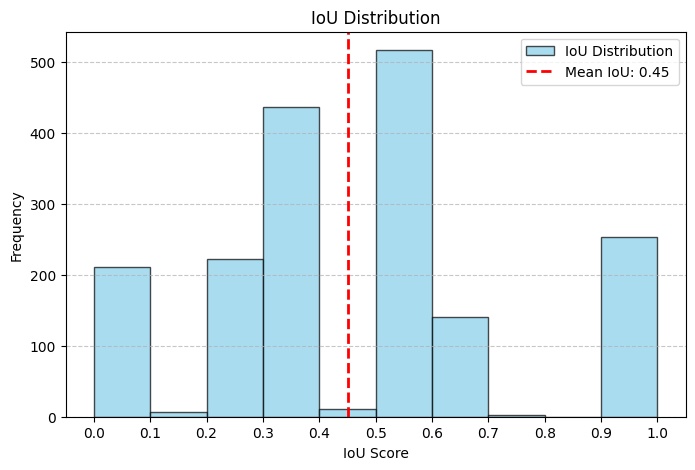

In [48]:
import matplotlib.pyplot as plt
import numpy as np

def compute_iou(set1, set2):
    """Compute Intersection over Union (IoU) for two sets."""
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union > 0 else 0

def plot_iou_distribution(df, col1, col2, title='IoU Distribution'):
    """
    Computes IoU for each row in df and plots the distribution with mean.
    
    :param df: Pandas DataFrame
    :param col1: First column (manual categories)
    :param col2: Second column (predicted categories)
    :param title: Title of the plot
    """
    # Compute IoUs for each row
    iou_scores = [
        compute_iou(set(row[col1]), set(row[col2])) 
        for _, row in df.iterrows()
    ]

    # Compute mean IoU
    mean_iou = np.mean(iou_scores)

    # Plot histogram
    plt.figure(figsize=(8, 5))
    plt.hist(iou_scores, color='skyblue', edgecolor='black', alpha=0.7, label='IoU Distribution')

    # Add vertical line for mean
    plt.axvline(mean_iou, color='red', linestyle='dashed', linewidth=2, label=f'Mean IoU: {mean_iou:.2f}')

    # Labels and formatting
    plt.xlabel('IoU Score')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(np.linspace(0, 1, 11))
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Usage
plot_iou_distribution(df_books, 'categories', 'pred_categories')


In [22]:
import numpy as np
from collections import Counter

def compute_conditional_probabilities(df, col1, col2):
    """
    Computes P(col2 | col1) and P(col1 | col2) along with their micro and macro averages.
    
    :param df: Pandas DataFrame
    :param col1: First column (manual categories)
    :param col2: Second column (predicted categories)
    :return: Dictionary with computed micro & macro averages
    """
    # Count occurrences for conditional probabilities
    count_col1 = Counter(cat for sublist in df[col1] for cat in sublist)
    count_col2_given_col1 = Counter(cat for sublist, sublist_col1 in zip(df[col2], df[col1]) for cat in sublist if cat in sublist_col1)

    count_col2 = Counter(cat for sublist in df[col2] for cat in sublist)
    count_col1_given_col2 = Counter(cat for sublist, sublist_col2 in zip(df[col1], df[col2]) for cat in sublist if cat in sublist_col2)

    # Compute conditional probabilities
    prob_col2_given_col1 = {cat: count_col2_given_col1[cat] / count_col1[cat] for cat in count_col1 if count_col1[cat] > 0}
    prob_col1_given_col2 = {cat: count_col1_given_col2[cat] / count_col2[cat] for cat in count_col2 if count_col2[cat] > 0}

    # Compute macro (simple mean) and micro (weighted by occurrences) averages
    macro_avg_col2_given_col1 = np.mean(list(prob_col2_given_col1.values()))
    macro_avg_col1_given_col2 = np.mean(list(prob_col1_given_col2.values()))

    micro_avg_col2_given_col1 = sum(count_col1[cat] * prob_col2_given_col1.get(cat, 0) for cat in count_col1) / sum(count_col1.values())
    micro_avg_col1_given_col2 = sum(count_col2[cat] * prob_col1_given_col2.get(cat, 0) for cat in count_col2) / sum(count_col2.values())

    # Print results
    print(f"Micro-average P(AI | Manual): {micro_avg_col2_given_col1:.4f}")
    print(f"Macro-average P(AI | Manual): {macro_avg_col2_given_col1:.4f}")
    print(f"Micro-average P(Manual | AI): {micro_avg_col1_given_col2:.4f}")
    print(f"Macro-average P(Manual | AI): {macro_avg_col1_given_col2:.4f}")

# Usage
compute_conditional_probabilities(df_books, 'categories', 'pred_categories')


Micro-average P(AI | Manual): 0.7274
Macro-average P(AI | Manual): 0.6687
Micro-average P(Manual | AI): 0.4443
Macro-average P(Manual | AI): 0.5324


## More Examples

In [52]:
show_books(df_books.sample(15, random_state=42))

Book (idx=1791)
 - Title: "Modern Romance"
 - Author: Aziz Ansari, Eric Klinenberg, PhD
 - Overview: What’s inside Find out how the image of love has changed over the past century and realize that there is no universal norm for romantic relationships.You’ll learn • The secrets of grandma's happy marriage • About dating in different countries • The impact of social media on personal life • How to meet your one and only About the author Aziz Ansari is a comedian and writer included in the 2016 Time 100 list of most influential people. Eric Klinenberg is a professor of Social Science and Director of the Institute for Public Knowledge at New York University.
 - Author Overview: Aziz Ansari is a comedian and writer included in the 2016 Time 100 list of most influential people. Eric Klinenberg is a professor of Social Science and Director of the Institute for Public Knowledge at New York University.
 - Learning items: ["The secrets of grandma's happy marriage", 'About dating in different cou